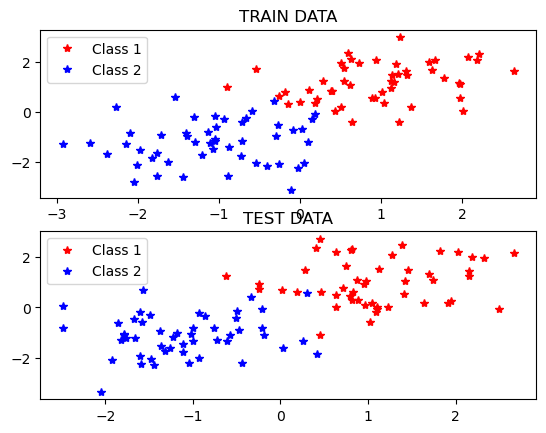

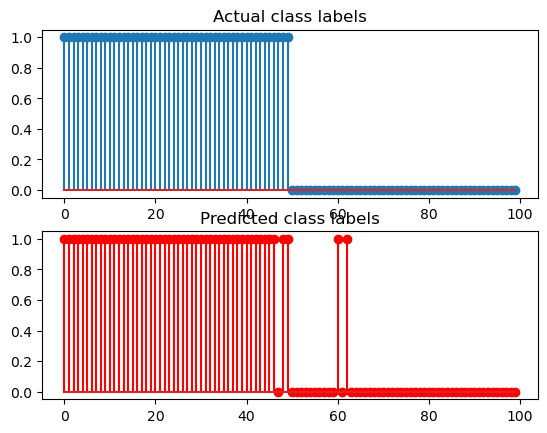

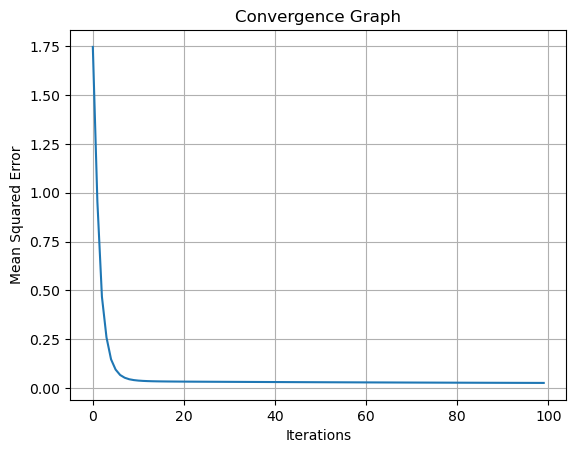

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(0)

# Data Generation for Class 1
M1 = np.array([1, 1])
CX1 = np.array([[0.6, 0.1], [0.1, 0.6]])
eigvals1, E1 = np.linalg.eigh(CX1)
X = np.random.randn(2, 100)
X1 = E1 @ np.diag(np.sqrt(eigvals1)) @ X + M1[:, np.newaxis]
# Data Generation for Class 2
M2 = np.array([-1, -1])
CX2 = np.array([[0.7, 0.1], [0.1, 0.7]])
eigvals2, E2 = np.linalg.eigh(CX2)
X = np.random.randn(2, 100)
X2 = E2 @ np.diag(np.sqrt(eigvals2)) @ X + M2[:, np.newaxis]

# Train/Test Split
t = np.hstack([np.ones(50), np.zeros(50)])  # True Output

p = np.argsort(np.random.rand(100))
TRAINDATA1 = X1[:, p[:50]]
TRAINDATA2 = X2[:, p[:50]]
TESTDATA1 = X1[:, p[50:]]
TESTDATA2 = X2[:, p[50:]]

TRAINDATA = np.hstack([TRAINDATA1, TRAINDATA2])  # 2*100 matrices
TESTDATA = np.hstack([TESTDATA1, TESTDATA2])

# Plotting training and test data
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(TRAINDATA1[0], TRAINDATA1[1], 'r*', label="Class 1")
plt.plot(TRAINDATA2[0], TRAINDATA2[1], 'b*', label="Class 2")
plt.title("TRAIN DATA")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(TESTDATA1[0], TESTDATA1[1], 'r*', label="Class 1")
plt.plot(TESTDATA2[0], TESTDATA2[1], 'b*', label="Class 2")
plt.title("TEST DATA")
plt.legend()

# Neural Network Segment of the code: 2 inputs → 2 hidden → 1 output

# Activation Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Add bias in weights by expanding them to 3 rows
W = np.random.rand(3, 2)   # 3x2 weights(2 for each feature of input and 1 bias term for each hidden neuron)
V = np.random.rand(3, 1)   # 3x1 weights(2 for information from each hidden and one bias term)

eta = 0.01 #Learning Rate
S = []

for _ in range(100):
    # Forward propagation
    input_bias = np.vstack([TRAINDATA, np.ones((1, 100))])  # Adding a bias row for ease of computation
    hidden_raw = W.T @ input_bias
    hidden_out = sigmoid(hidden_raw) 

    hidden_bias = np.vstack([hidden_out, np.ones((1, 100))]) #Activation passed to the output neuron
    output = V.T @ hidden_bias  # Linear activation to get output 

    error = t - output.flatten() 

    # Updat ion of V (output layer weights)
    for i in range(2):  # hidden neurons
        V[i, 0] += eta * np.sum(error * hidden_out[i, :]) #Weight Correction
    V[2, 0] += eta * np.sum(error)  # Bias correction

    # Updation of W (input to hidden layer weights)
    for i in range(2):  # for each hidden neuron
        delta = error * hidden_out[i, :] * (1 - hidden_out[i, :])#derivative of acitvation function
        W[0, i] += eta * np.sum(delta * TRAINDATA[0, :])
        W[1, i] += eta * np.sum(delta * TRAINDATA[1, :])
        W[2, i] += eta * np.sum(delta)  # Bias correction

    S.append(np.mean(error ** 2))
    
# Predicting on Test Dataset

input_bias_test = np.vstack([TESTDATA, np.ones((1, 100))])
hidden_raw_test = W.T @ input_bias_test
hidden_out_test = sigmoid(hidden_raw_test)

hidden_bias_test = np.vstack([hidden_out_test, np.ones((1, 100))])
output_test = V.T @ hidden_bias_test  # Shape (1, 100)

INDEX = (output_test.flatten() > 0.5).astype(int) #This line Flattens the output and converts into a boolean based on the condition checing for each element
t_test = np.hstack([np.ones(50), np.zeros(50)])
correct = np.sum(INDEX == t_test)

# Plotting Results

plt.figure()
plt.subplot(2, 1, 1)
plt.stem(t_test)
plt.title('Actual class labels')
plt.subplot(2, 1, 2)
plt.stem(INDEX, linefmt='r', markerfmt='ro')
plt.title('Predicted class labels')


plt.figure()
plt.plot(S)
plt.title('Convergence Graph')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.grid(True)
